In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Los datos fueron adquiridos analizando el dataset "Top European Football League Matches 2000-2023" en Kaggel( https://www.kaggle.com/datasets/beridzeg45/top-european-football-league-matches-2000-2023 ). utilice el siguiente SQL query para ello. 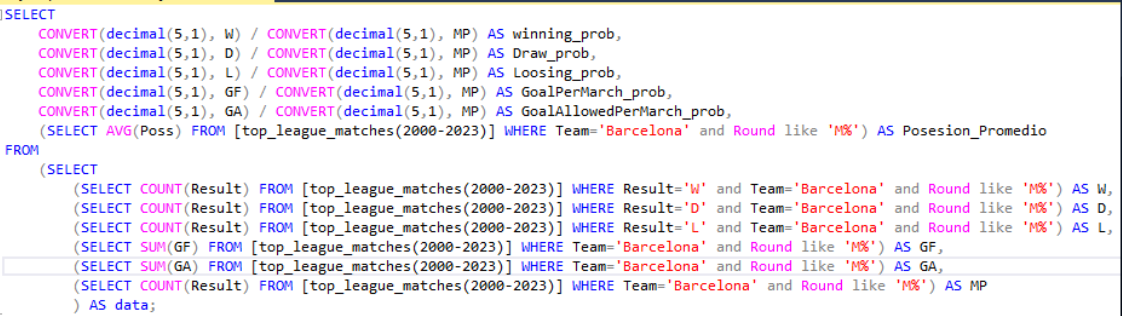

In [ ]:
#datos
data={"Barcelona":{
    "winning_prob":0.66,
    "draw_prob":0.2,
    "losing_prob":0.14,
    "goals_per_game":2.3,
    "goals_permitted":.9,
    "poss_promedio":65.1
},
"Real Madrid":{
    "winning_prob":0.67,
    "draw_prob":0.17,
    "losing_prob":0.16,
    "goals_per_game":2.29,
    "goals_permitted":1,
    "poss_promedio":58.6
},
"Atletico de Madrid":{
    "winning_prob":0.52,
    "draw_prob":0.24,
    "losing_prob":0.25,
    "goals_per_game":1.5,
    "goals_permitted":.96,
    "poss_promedio":49.3
},

"Real Sociedad":{
    "winning_prob":0.38,
    "draw_prob":0.25,
    "losing_prob":0.37,
    "goals_per_game":1.3,
    "goals_permitted":1.3,
    "poss_promedio":54.1
    },
"Virrarreal":{
    "winning_prob":0.42,
    "draw_prob":0.26,
    "losing_prob":0.32,
    "goals_per_game":1.4,
    "goals_permitted":1.2,
    "poss_promedio":51.3
},
"Real Betis":{
    "winning_prob":0.35,
    "draw_prob":0.28,
    "losing_prob":0.38,
    "goals_per_game":1.2,
    "goals_permitted":1.4,
    "poss_promedio":53.5
},
"Osasuna":{
    "winning_prob":0.31,
    "draw_prob":0.27,
    "losing_prob":0.42,
    "goals_per_game":1.1,
    "goals_permitted":1.4,
    "poss_promedio":44.9
},
"Athletic Club":{
    "winning_prob":0.37,
    "draw_prob":0.27,
    "losing_prob":0.36,
    "goals_per_game":1.2,
    "goals_permitted":1.3,
    "poss_promedio":50.1
},
"Mallorca":{
    "winning_prob":0.34,
    "draw_prob":0.24,
    "losing_prob":0.41,
    "goals_per_game":1.2,
    "goals_permitted":1.4,
    "poss_promedio":44.2
    },
"Girona":{
    "winning_prob":0.31,
    "draw_prob":0.26,
    "losing_prob":0.43,
    "goals_per_game":.83,
    "goals_permitted":1.1,
    "poss_promedio":48.5
    },
"Rayo Vallecano":{
    "winning_prob":0.31,
    "draw_prob":0.22,
    "losing_prob":0.48,
    "goals_per_game":1.2,
    "goals_permitted":1.7,
    "poss_promedio":52.3
},
"Sevilla":{
    "winning_prob":0.46,
    "draw_prob":0.23,
    "losing_prob":0.3,
    "goals_per_game":1.4,
    "goals_permitted":1.1,
    "poss_promedio":55.5
},
"Celta de Vigo":{
    "winning_prob":0.35,
    "draw_prob":0.26,
    "losing_prob":0.39,
    "goals_per_game":1.2,
    "goals_permitted":1.3,
    "poss_promedio":53.8
},
"Cadiz":{
    "winning_prob":0.24,
    "draw_prob":0.34,
    "losing_prob":0.43,
    "goals_per_game":.75,
    "goals_permitted":1.1,
    "poss_promedio":38.9
},
"Getafe":{
    "winning_prob":0.32,
    "draw_prob":0.27,
    "losing_prob":0.41,
    "goals_per_game":.99,
    "goals_permitted":1.2,
    "poss_promedio":43.1
},
"Valencia":{
    "winning_prob":0.44,
    "draw_prob":0.26,
    "losing_prob":0.297,
    "goals_per_game":1.4,
    "goals_permitted":1.2,
    "poss_promedio":48.6
},
"Almeria":{
    "winning_prob":0.27,
    "draw_prob":0.24,
    "losing_prob":0.47,
    "goals_per_game":.94,
    "goals_permitted":1.4,
    "poss_promedio":46
},
"Real Valladolid":{
    "winning_prob":0.26,
    "draw_prob":0.31,
    "losing_prob":0.43,
    "goals_per_game":.99,
    "goals_permitted":1.3,
    "poss_promedio":46
    },
"Espanyol":{
    "winning_prob":0.32,
    "draw_prob":0.26,
    "losing_prob":0.42,
    "goals_per_game":1.1,
    "goals_permitted":1.3,
    "poss_promedio":46.3
},
"Elche":{
    "winning_prob":0.23,
    "draw_prob":0.27,
    "losing_prob":0.50,
    "goals_per_game":.77,
    "goals_permitted":1.2,
    "poss_promedio":46.8
}}

In [ ]:
#Variables Transportadoras/UBER
results = []
goals_anotados=[]
goals_permitidos=[]
equipos=list(data.keys())

In [ ]:
def probabilidad_ganar(prob_goal_scored, prob_win_past, prob_goal_allowed, prob_lose_past, porcentaje_posesion):
    # Calcular la probabilidad de ganar basada en los goles promedio anotados y permitidos
    avg_goals_scored = prob_goal_scored * prob_win_past
    avg_goals_allowed = prob_goal_allowed * prob_lose_past

    # Calcular la probabilidad de ganar utilizando regresión logística y el porcentaje de posesión
    z = (avg_goals_scored - avg_goals_allowed) + porcentaje_posesion  # Suma ponderada con el porcentaje de posesión
    prob_win_next = 1 / (1 + np.exp(-z))  # Aplicar la función logística para obtener la probabilidad final

    return prob_win_next

In [ ]:
def probabilidad_perder(prob_goal_scored, prob_win_past, prob_goal_allowed, prob_lose_past, porcentaje_posesion):
    # Calcular la probabilidad de perder basada en los goles promedio anotados y permitidos
    avg_goals_scored = prob_goal_scored * prob_win_past
    avg_goals_allowed = prob_goal_allowed * prob_lose_past

    # Calcular la probabilidad de perder utilizando regresión logística y el porcentaje de posesión
    z = (avg_goals_allowed - avg_goals_scored) - porcentaje_posesion  # Suma ponderada con el negativo del porcentaje de posesión
    prob_lose_next = 1 / (1 + np.exp(-z))  # Aplicar la función logística para obtener la probabilidad final

    return prob_lose_next

In [ ]:
def probabilidad_empatar(prob_goal_scored, prob_win_past, prob_goal_allowed, prob_lose_past, porcentaje_posesion):
    # Calcular la probabilidad de ganar basada en los goles promedio anotados y permitidos
    avg_goals_scored = prob_goal_scored * prob_win_past
    avg_goals_allowed = prob_goal_allowed * prob_lose_past

    # Calcular la probabilidad de ganar utilizando regresión logística y el porcentaje de posesión
    z_win = (avg_goals_scored - avg_goals_allowed) + porcentaje_posesion  # Suma ponderada con el porcentaje de posesión para ganar
    prob_win_next = 1 / (1 + np.exp(-z_win))  # Aplicar la función logística para obtener la probabilidad de ganar

    # Calcular la probabilidad de perder utilizando regresión logística y el porcentaje de posesión
    z_lose = (avg_goals_allowed - avg_goals_scored) - porcentaje_posesion  # Suma ponderada con el negativo del porcentaje de posesión para perder
    prob_lose_next = 1 / (1 + np.exp(-z_lose))  # Aplicar la función logística para obtener la probabilidad de perder

    # Calcular la probabilidad de empatar como complemento de las probabilidades de ganar y perder
    prob_draw_next = 1 - prob_win_next - prob_lose_next

    return prob_draw_next

In [ ]:
def partidos(equipo1, equipo2):

    #probabilidades del equipo 1
    win_prob1 = probabilidad_ganar(data[equipo1]["goals_per_game"], data[equipo1]["winning_prob"],
    data[equipo1]["goals_permitted"], data[equipo1]["losing_prob"], data[equipo1]["poss_promedio"])

    draw_prob1 = probabilidad_empatar(data[equipo1]["goals_per_game"], data[equipo1]["winning_prob"],
    data[equipo1]["goals_permitted"], data[equipo1]["losing_prob"], data[equipo1]["poss_promedio"])

    lose_prob1 = probabilidad_perder(data[equipo1]["goals_per_game"], data[equipo1]["winning_prob"],
    data[equipo1]["goals_permitted"], data[equipo1]["losing_prob"], data[equipo1]["poss_promedio"])

    #probabilidades del equipo 2
    win_prob2 = probabilidad_ganar(data[equipo2]["goals_per_game"], data[equipo2]["winning_prob"],
    data[equipo2]["goals_permitted"], data[equipo2]["losing_prob"], data[equipo1]["poss_promedio"])

    draw_prob2 = probabilidad_empatar(data[equipo2]["goals_per_game"], data[equipo2]["winning_prob"],
    data[equipo2]["goals_permitted"], data[equipo2]["losing_prob"], data[equipo1]["poss_promedio"])

    lose_prob2 = probabilidad_perder(data[equipo2]["goals_per_game"], data[equipo2]["winning_prob"],
    data[equipo2]["goals_permitted"], data[equipo2]["losing_prob"], data[equipo1]["poss_promedio"])

    # Generar el resultado del partido en base a las probabilidades de ambos equipos
    win_prob_total = win_prob1 * (1 - lose_prob2)
    draw_prob_total = draw_prob1 * draw_prob2
    lose_prob_total = (1 - win_prob1) * lose_prob2

    result = random.choices(["win", "draw", "lose"], [win_prob_total, draw_prob_total, lose_prob_total])[0]

    if result == "win":
        goals_equipo1 = np.random.poisson(data[equipo1]["goals_per_game"])
        goals_equipo2 = np.random.poisson(data[equipo2]["goals_per_game"])
        if goals_equipo1 < goals_equipo2:
            print("Derrota:", equipo1, "- Victoria:", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_anotados.append(goals_equipo1)
            goals_permitidos.append(goals_equipo2)
            results.append(0)
        elif goals_equipo1 == goals_equipo2:
            print("Empate entre", equipo1, "y", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_anotados.append(goals_equipo1)
            goals_permitidos.append(goals_equipo2)
            results.append(1)
        else:
            print("Victoria:", equipo1, "- Derrota:", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(3)

    elif result == "draw":
        goals_equipo1 = np.random.poisson(data[equipo1]["goals_per_game"])
        goals_equipo2 = np.random.poisson(data[equipo2]["goals_per_game"])
        if goals_equipo1 < goals_equipo2:
            print("Derrota:", equipo1, "- Victoria:", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(0)
        elif goals_equipo1 > goals_equipo2:
            print("Victoria:", equipo1, "- Derrota:", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(3)
        else:
            print("Empate entre", equipo1, "y", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(1)
    else:
        goals_equipo1 = np.random.poisson(data[equipo1]["goals_permitted"])
        goals_equipo2 = np.random.poisson(data[equipo2]["goals_per_game"])
        if goals_equipo1 > goals_equipo2:
            print("Victoria:", equipo1, "- Derrota:", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(3)
        elif goals_equipo1 == goals_equipo2:
            print("Empate entre", equipo1, "y", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(1)
        else:
            print("Derrota:", equipo1, "- Victoria:", equipo2)
            print("Resultado:", goals_equipo1, "-", goals_equipo2)
            goals_permitidos.append(goals_equipo2)
            goals_anotados.append(goals_equipo1)
            results.append(0)

In [ ]:
# diccionario para almacenar los resultados de cada equipo
results_dict = {
    "Barcelona": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Real Madrid": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Atletico de Madrid": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Real Sociedad": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Virrarreal": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Real Betis": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Osasuna": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Athletic Club": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Mallorca": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Girona": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Rayo Vallecano": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Sevilla": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Celta de Vigo": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Cadiz": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Getafe": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Valencia": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Almeria": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Real Valladolid": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Espanyol": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]},
    "Elche": {"puntos por partido":[], "Goles anotados":[],"Goles permitidos":[]}
}

In [ ]:
# Simulación de partidos en la temporada por equipos
for team in equipos:
    for i in range(38):
        while True:
            team2 = random.choice(equipos)
            if team != team2:
                break
        partidos(team, team2)

    # Guardar los resultados en la lista correspondiente al equipo
    results_dict[team]["puntos por partido"].extend(results)
    results_dict[team]["Goles anotados"].extend(goals_anotados)
    results_dict[team]["Goles permitidos"].extend(goals_permitidos)

    # Limpiar las listas para el siguiente equipo
    goals_permitidos.clear()
    goals_anotados.clear()
    results.clear()

    print("************====================================*****************")
    print("=================================================================")


Empate entre Barcelona y Rayo Vallecano
Resultado: 1 - 1
Empate entre Barcelona y Elche
Resultado: 0 - 0
Victoria: Barcelona - Derrota: Real Valladolid
Resultado: 5 - 2
Derrota: Barcelona - Victoria: Getafe
Resultado: 1 - 2
Victoria: Barcelona - Derrota: Getafe
Resultado: 3 - 0
Victoria: Barcelona - Derrota: Atletico de Madrid
Resultado: 2 - 1
Victoria: Barcelona - Derrota: Sevilla
Resultado: 2 - 1
Derrota: Barcelona - Victoria: Real Valladolid
Resultado: 2 - 3
Victoria: Barcelona - Derrota: Getafe
Resultado: 3 - 0
Derrota: Barcelona - Victoria: Valencia
Resultado: 1 - 2
Victoria: Barcelona - Derrota: Elche
Resultado: 5 - 2
Victoria: Barcelona - Derrota: Girona
Resultado: 3 - 1
Victoria: Barcelona - Derrota: Rayo Vallecano
Resultado: 3 - 2
Victoria: Barcelona - Derrota: Real Madrid
Resultado: 5 - 3
Victoria: Barcelona - Derrota: Almeria
Resultado: 5 - 0
Derrota: Barcelona - Victoria: Virrarreal
Resultado: 0 - 2
Victoria: Barcelona - Derrota: Real Sociedad
Resultado: 2 - 1
Victoria: Bar

In [ ]:
#dataframe de puntos de cada equipo
puntos_por_equipo=pd.DataFrame()
for i in equipos:
    puntos_por_equipo[i]=results_dict[i]["puntos por partido"]

In [ ]:
#dataframe de posiciones al final de la temporada
dfs = []

# Calcular los puntos, goles anotados, goles permitidos y diferencia de goles para cada equipo
for equipo in equipos:
    MP=len(results_dict[equipo]["puntos por partido"])
    W=results_dict[equipo]["puntos por partido"].count(3)
    L=results_dict[equipo]["puntos por partido"].count(0)
    D=results_dict[equipo]["puntos por partido"].count(1)
    puntos = sum(results_dict[equipo]["puntos por partido"])
    goles_anotados = sum(results_dict[equipo]["Goles anotados"])
    goles_permitidos = sum(results_dict[equipo]["Goles permitidos"])
    diferencia_goles = goles_anotados - goles_permitidos

    # Crear un DataFrame para el equipo actual
    df_equipo = pd.DataFrame({
        "Equipo": [equipo],
        "MP": [MP],
        "W": [W],
        "L": [L],
        "D": [D],
        "Pts": [puntos],
        "GA": [goles_anotados],
        "GP": [goles_permitidos],
        "DG": [diferencia_goles]
    })

    # Agregar el DataFrame a la lista
    dfs.append(df_equipo)

# Concatenar todos los DataFrames en uno solo
tabla_posiciones = pd.concat(dfs, ignore_index=True)

# Ordenar la tabla de posiciones por puntos y diferencia de goles en orden descendente
tabla_posiciones = tabla_posiciones.sort_values(by=["Pts", "DG"], ascending=False).reset_index(drop=True)

# Imprimir la tabla de posiciones
print("Tabla de Posiciones Temporada 2023/2024")
print(tabla_posiciones)

Tabla de Posiciones Temporada 2023/2024
                Equipo  MP   W   L   D  Pts  GA  GP  DG
0          Real Madrid  38  22   3  13   79  90  46  44
1            Barcelona  38  21   8   9   72  87  50  37
2   Atletico de Madrid  38  14   8  16   58  52  43   9
3        Celta de Vigo  38  17  15   6   57  52  54  -2
4             Valencia  38  15  12  11   56  57  56   1
5           Virrarreal  38  15  13  10   55  55  53   2
6        Real Sociedad  38  13  11  14   53  48  37  11
7              Sevilla  38  14  13  11   53  48  42   6
8           Real Betis  38  14  13  11   53  49  48   1
9             Espanyol  38  14  15   9   51  53  47   6
10               Cadiz  38  11  13  14   47  29  36  -7
11              Getafe  38   9  11  18   45  32  37  -5
12      Rayo Vallecano  38  13  19   6   45  46  64 -18
13             Almeria  38  11  18   9   42  34  57 -23
14     Real Valladolid  38   9  15  14   41  40  50 -10
15            Mallorca  38  10  18  10   40  40  50 -10
16      

In [ ]:
# Clasificaciones al final de temporada
print("Equipos que clasifican a Champions League:")
print(tabla_posiciones.iloc[0,0])
print(tabla_posiciones.iloc[1,0])
print(tabla_posiciones.iloc[2,0])
print(tabla_posiciones.iloc[3,0])
print("Equipos que clasifican a Europa League:")
print(tabla_posiciones.iloc[4,0])
print(tabla_posiciones.iloc[5,0])
print("Equipos que clasifican a Europa Conference League:")
print(tabla_posiciones.iloc[6,0])
print("Equipos que Descienden a Segunda Division:")
print(tabla_posiciones.iloc[18,0])
print(tabla_posiciones.iloc[19,0])

Equipos que clasifican a Champions League:
Real Madrid
Barcelona
Atletico de Madrid
Celta de Vigo
Equipos que clasifican a Europa League:
Valencia
Virrarreal
Equipos que clasifican a Europa Conference League:
Real Sociedad
Equipos que Descienden a Segunda Division:
Athletic Club
Elche


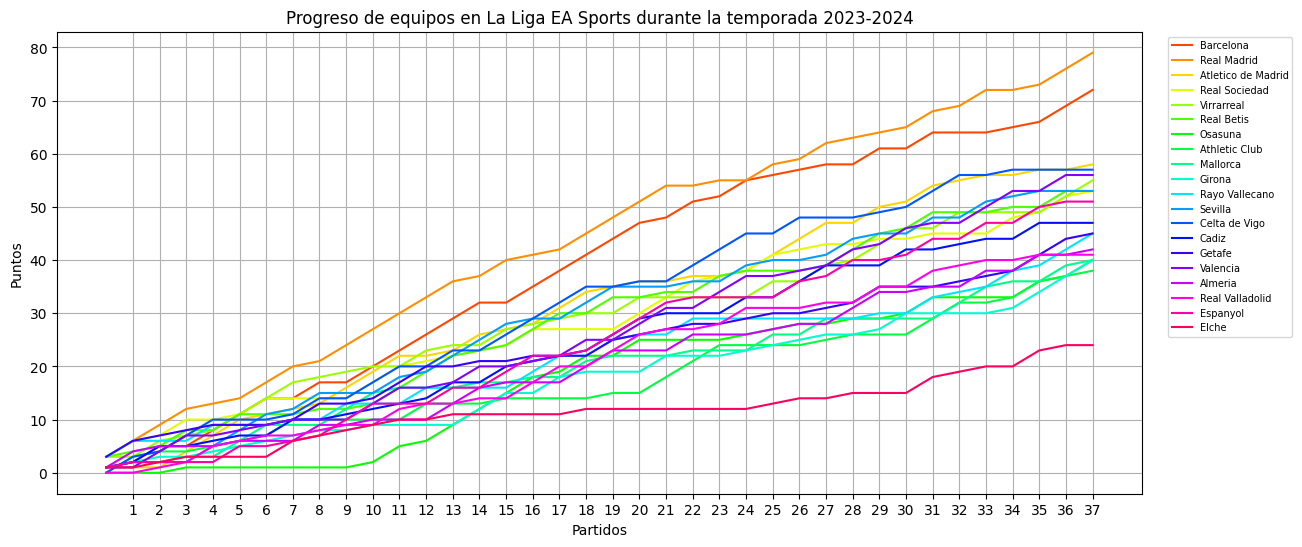

In [ ]:
#Grafica
plt.figure(figsize=(14, 6))
palette = sns.color_palette("hsv", len(equipos))

for i, equipo in enumerate(equipos):
    plt.plot(puntos_por_equipo[equipo].cumsum(), color=palette[i])

plt.legend(equipos, fontsize=7, bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(range(1, 38))
plt.grid(True)
plt.xlabel('Partidos')
plt.ylabel('Puntos')
plt.title('Progreso de equipos en La Liga EA Sports durante la temporada 2023-2024')

plt.show()